In [53]:
# ! pip install PyPortfolioOpt
import pandas as pd
import numpy as np
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.hierarchical_risk_parity import hrp_portfolio
from pypfopt.value_at_risk import CVAROpt
from pypfopt import discrete_allocation
import matplotlib.pyplot as plt

https://medium.com/python-data/effient-frontier-in-python-34b0c3043314

In [54]:
df = pd.read_excel("/Users/guapofish/Desktop/data_new.xlsx", parse_dates=True, index_col="Time")
df.head()

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5
Time,,,,,
2001-01-31,0.026618,0.066785,0.016776,-0.005879,-0.004952
2001-02-28,-0.021992,0.003230,0.003005,-0.105203,-0.018137
2001-03-31,-0.018649,-0.022686,0.007740,-0.075525,-0.037709
2001-04-30,0.012484,-0.010529,-0.003717,0.093232,0.019367
2001-05-31,0.011831,0.019415,0.009853,-0.061596,0.010683


In [55]:
# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = 5
num_portfolios = 10000

selected = ['Asset 1','Asset 2','Asset 3','Asset 4','Asset 5']

In [56]:
# calculate monthly and annual returns of the stocks
returns_monthly = df
returns_annual = (returns_monthly.mean() + 1)**12 - 1

# get monthly and covariance of returns of the stock
cov_monthly = returns_monthly.cov()
cov_annual = (cov_monthly + 1)**12 - 1

In [57]:
# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

In [58]:
# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility'] + [stock+' weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

df.head()

,Returns,Volatility,Asset 1 weight,Asset 2 weight,Asset 3 weight,Asset 4 weight,Asset 5 weight
0,0.091965,0.079403,0.247587,0.266009,0.142636,0.278531,0.065238
1,0.096202,0.091540,0.075986,0.130142,0.245740,0.394797,0.153336
2,0.098571,0.073991,0.219878,0.203300,0.180771,0.233572,0.162480
3,0.096988,0.066681,0.153457,0.209373,0.261717,0.193845,0.181607
4,0.077509,0.049718,0.006018,0.506972,0.406737,0.077090,0.003183


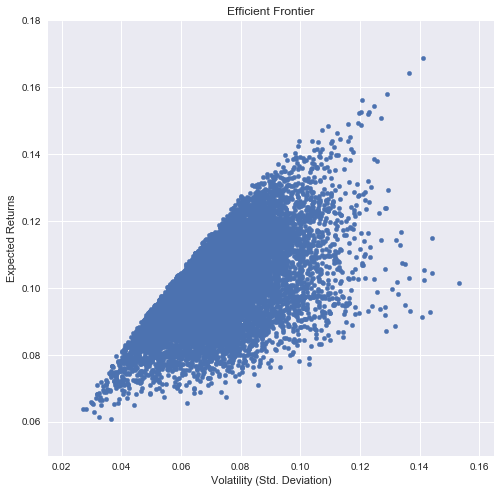

In [59]:
# plot the efficient frontier with a scatter plot
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(8, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

Since the client's minimum accepted loss is 20% with 99percent cl, the max volitility is 20%/2.56 = 7.8125%
Also, the return should be greater than 8.7% to fulfill the minimum requirement of the client. 


In [89]:
df_new = df.loc[df['Volatility'] < 0.078125]
pick1 = df_new.loc[df_new['Returns'] == df_new['Returns'].max()]
pick1

,Returns,Volatility,Asset 1 weight,Asset 2 weight,Asset 3 weight,Asset 4 weight,Asset 5 weight
6009,0.124662,0.077931,0.007491,0.632133,0.034151,0.027418,0.298807


In [97]:
df_new2 = df_new.loc[(df_new['Asset 1 weight']>0.1)&(df_new['Asset 2 weight']>0.1)&(df_new['Asset 3 weight']>0.1)&
                     (df_new['Asset 4 weight']>0.1)&(df_new['Asset 5 weight']>0.1)]
pick2 = df_new2.loc[df_new2['Returns'] == df_new2['Returns'].max()]
pick2

,Returns,Volatility,Asset 1 weight,Asset 2 weight,Asset 3 weight,Asset 4 weight,Asset 5 weight
4775,0.118117,0.077575,0.13797,0.27981,0.134466,0.113142,0.334612


In [40]:
mu = returns_annual
S = cov_annual
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1), gamma=1)
weights = ef.min_volatility()
print(weights)
ef.portfolio_performance(verbose=True)

{'Asset 1': 0.20190017748783182, 'Asset 2': 0.20135494201304366, 'Asset 3': 0.2050722672980744, 'Asset 4': 0.1941121786138559, 'Asset 5': 0.19756043458719427}
Expected annual return: 10.1%
Annual volatility: 7.0%
Sharpe Ratio: 1.15


(0.10063213994535794, 0.07015436208329501, 1.149353191318632)

In [49]:
weights

{'Asset 1': 0.20190017748783182,
 'Asset 2': 0.20135494201304366,
 'Asset 3': 0.2050722672980744,
 'Asset 4': 0.1941121786138559,
 'Asset 5': 0.19756043458719427}